## Work-Flow:
1. Fetch Data (CSV)
2. Clean the Data:
    - Unify currency for (Booking total, Total Revenue)
    - Other stuff 
3. Pre-Data Visualisation:
    - Find Linear correlation factor between features and 3 targets
4. Data Visualization:
    - Visualize most relevant data
        - Bar graphs for stars vs. total number of bookings
        - Scatter Plots, histograms, funnels, etc..
5. Data Seperation:
    - Seperate data into sets based on supplier and perform correlation again to check if there is a difference between the 2
    - Perform more data visualization
6. Run regressions models on the data and check accuracy
    - Linear Regression (https://github.com/Abdel-Razzak/DSF/blob/machine-learning/Supervised%20Learning%20-%20%20Linear%20Regression.ipynb)
    - Random Forest Regressor (https://github.com/Abdel-Razzak/ADS/blob/012ee5cb8639ccbc2b4810d9001e2f00fde300a6/Decision-Trees-and-Random-Forests/Decision%20Trees%20and%20Random%20Forests.ipynb)
7. Select Regression Model


TODO:
Create field called "Content Score" and "Review Score" 

## Questions to Ask:
1) Which types of problems does Gaussian Naive Bayes Solve

![alt text](https://github.com/Abdel-Razzak/ADS/raw/039c281d7747a88780dc89bcf210f204a704678c/S2/images/mlprocess.PNG "Logo Title Text 1")

### Importing

In [6]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
import missingno as msno
import plotly.plotly as py
import plotly.graph_objs as go

### Reading the Data

In [7]:
df = pd.read_csv('properties2.csv', sep=';', dtype={'id': int, 'stars': float})

### Looking at the Data

In [1]:
#df.describe()

In [90]:
local_df = df.loc[(df['supplier_id'] == 1) | (df['supplier_id'] == 3)]
non_local_df = df.loc[df['supplier_id'] == 2]

In [2]:
#msno.matrix(local_df)

In [92]:
#Counting total number of Null values
print("Number of Null values in local hotels=" ,local_df.isnull().sum().sum())

Number of Null values in local hotels= 2827


In [93]:
#local_df.describe()

In [94]:
#local_df.head()

### Data Cleaning
   - Replace empty value:
    - Replace empty values with 0
   - Convert (totalCommission, totalRevenue) currencies to USD

In [95]:
# Replacing Null values with 0
df.fillna(0, inplace=True)                # For all data
local_df.fillna(0, inplace=True)          # For local hotels

print("Number of Null values in local dataframe after cleaning is=" , local_df.isnull().sum().sum())

Number of Null values in local dataframe after cleaning is= 0


/Users/mac/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2762: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [3]:
#After Data Cleaning
#msno.matrix(df)

### Removing negative rank (setting it to 0)

In [97]:
def NegativesToZero(data):
    data = np.array(data)
    print(len(data))
    for i in range (len(data)):
        if data[i] < 0:
            data[i] = 0
    return data

rank = NegativesToZero(local_df['rank'])

local_df['rank'] = rank

1055


/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### Rounding rating to the nearest tenth

In [98]:
rating = np.array(local_df['AvgUserRating'])

local_df['AvgUserRating'] = np.around(rating, decimals=1)

/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### Count number of properties per star rating (note 0 are unrated hotels)

In [4]:
#Count number of properties per star rating (note 0 are unrated hotels)
#sns.countplot(x="stars", data=local_df)

## Here we see a correllation between number of reviews the hotel has and the amount of bookings it gets

In [9]:
# Plot the number of bookings per strar rating
#plt.scatter(local_df.numberOfReviews,local_df.numberOfBookings, marker = 'o')


#label
#plt.ylabel('Number Of Bookings')
#plt.xlabel('Number Of Reviews')

In [11]:
# Plot the number of bookings per strar rating
#plt.scatter(local_df.AvgUserRating,local_df.numberOfBookings, marker = 'o')


#label
#plt.ylabel('Number Of Bookings')
#plt.xlabel('Avg Rating')

In [12]:
## Plot the number of bookings per strar rating
#plt.scatter(local_df.numberOfBookings,local_df.numberOfReviews, marker = 'o')


##label
#plt.ylabel('Number Of Reviews')
#plt.xlabel('Number Of Bookings')

In [13]:
## Plot the number of bookings per strar rating
#plt.scatter(local_df.is_cardless,local_df.numberOfReviews, marker = '.')


##label
#plt.ylabel('Cardless')
#plt.xlabel('Number Of Bookings')

In [14]:
## Plot the number of bookings per strar rating
#plt.scatter(local_df.numberOfReviews,local_df.numberOfBookedNights, marker = 'o')

##label
#plt.ylabel('Number Of Booked Nights')
#plt.xlabel('Number Of Reviews')

## Checking out correllation between number of images and booking count

In [15]:
## Plot the number of bookings per images 
#plt.scatter(local_df.imageCount,local_df.numberOfBookings, marker = 'o')
#plt.xlim(0, 135)
#plt.ylim(0, 500)


##label
#plt.ylabel('Number of bookings')
#plt.xlabel('Number of Images')

## Exploring how many hotels have a Description

In [16]:
# Plot the number of bookings per images 
#sns.countplot(x="hasDescription", data=local_df)

In [17]:
# Plot the number of bookings per images 
#sns.countplot(x="is_cardless", data=local_df)

### To-Do: Build correct bar graph for bookings per star rating

In [108]:
#df.plot('stars', 'numberOfBookings', kind='bar', color='r')

## Linear Correlation

In [109]:
#Selecting numeric values from the dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = local_df.select_dtypes(include=numerics)

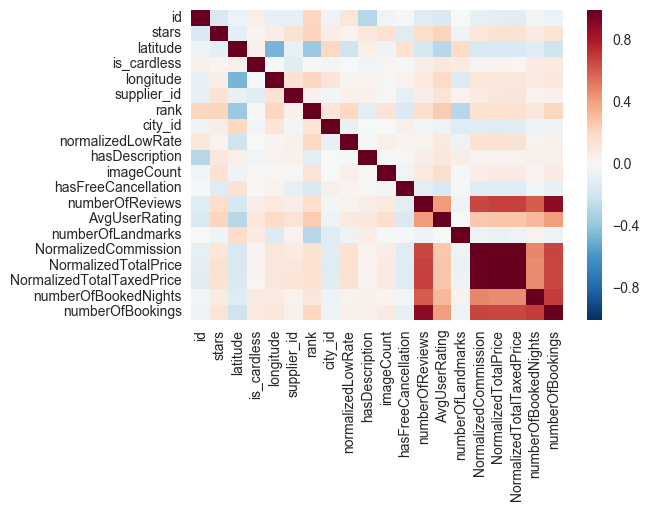

In [110]:
# calculate the correlation matrix
corr = numeric_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [111]:
print("Number of Null values in the dataframe =" ,numeric_df.isnull().sum().sum())

Number of Null values in the dataframe = 0


<img  src="rapidminer-process-logic-single-nesting.png"/>

# Checking Linear Regression Model on the Data

In [112]:
# Create a LinearRegression Object
lreg = LinearRegression(normalize=True)

# Data Columns
X_multi = numeric_df.loc[:, ['stars', 'numberOfReviews', 'AvgUserRating', 'hasDescription', 'is_cardless']]
#X_multi = numeric_df.drop(['numberOfBookings', 'NormalizedTotalPrice', 'NormalizedCommission', 'NormalizedTotalTaxedPrice', 'numberOfBookedNights'], axis=1)

# Targets
Y_target = numeric_df.numberOfBookings

X_multi.head()

,stars,numberOfReviews,AvgUserRating,hasDescription,is_cardless
0,5.0,79.0,3.6,1,0
1,4.0,8.0,4.0,1,0
4,3.0,0.0,0.0,1,0
6,3.0,9.0,3.9,1,0
7,4.0,2.0,3.0,1,0


In [113]:
# Train the model
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [114]:
#print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

In [115]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 5 


In [116]:
# Set a DataFrame from the Features
Features       = X_multi.columns
CoefficientsDf = pd.DataFrame(lreg.coef_)

#Initiating a new Dataframe with the columns and their features
new = pd.DataFrame()
new['Features'] = Features
new['Coefficients'] = CoefficientsDf

# Show
print(new)

          Features  Coefficients
0            stars     -1.004636
1  numberOfReviews      3.640569
2    AvgUserRating      1.076005
3   hasDescription     -2.281347
4      is_cardless      4.378557


## Training and Validation

In [117]:
# Question: Can't I use multiple values of X ?
X = numeric_df.numberOfReviews
print(X.head())

0    79.0
1     8.0
4     0.0
6     9.0
7     2.0
Name: numberOfReviews, dtype: float64


In [118]:
# Use v to make X two-dimensional
X = np.vstack(numeric_df.numberOfReviews)
print(X[:5])

[[ 79.]
 [  8.]
 [  0.]
 [  9.]
 [  2.]]


In [119]:
X = np.array( [ [value,1] for value in X ] )
print(X[:5])

[[array([ 79.]) 1]
 [array([ 8.]) 1]
 [array([ 0.]) 1]
 [array([ 9.]) 1]
 [array([ 2.]) 1]]


In [120]:
# CHECK THIS OUT !
# X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)


# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,numeric_df.numberOfBookings)

#print(X_train[:5], X_test[:5], Y_train[:5] , Y_test[:5])

In [121]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(791, 2) (264, 2) (791,) (264,)


In [122]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print(X_train[0]) 
print(pred_train[:5])

[array([ 17.]) 1]
[ 66.6397546    3.90522287   7.59548944  14.97602259  26.0468223 ]


## Predicting amount of bookings for 2 hotels with number of reviews 79 and 8

In [19]:
# Predicting amount of bookings for 2 hotels with number of reviews 79 and 8

#test_hotels_reviews = np.array([79.0, 8.0])
#test_hotels_review_count = np.vstack(test_hotels_reviews)
#test_hotels_review_count = np.array([ [value,1] for value in test_hotels_review_count ])

#predicted_bookings = lreg.predict(test_hotels_review_count)
#print("Predicted bookings for hotels with", test_hotels_reviews, 'review count is=', predicted_bookings, 'respectively')

In [126]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 331.62
Fit a model X_train, and calculate MSE with X_test and Y_test: 269.19


## Residual Plots
In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:
$$Residual = Observed\:value - Predicted\:value $$
You can think of these residuals in the same way as the D value we discussed earlier, in this case however, there were multiple data points considered.
A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.
Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.

Check: http://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis

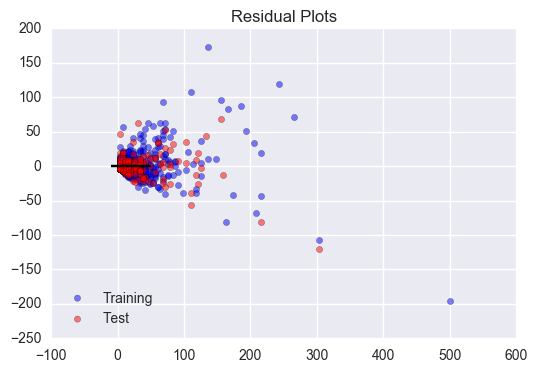

In [44]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

## To-Do: Check accuracy of Linear Regression Model for single point

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

## Univariate Random Forest Regressor

In [22]:
#x = numeric_df.numberOfReviews
#y = numeric_df.numberOfBookings


## X points dynamically chosen according to max number of reviews
#xfit = np.linspace(min(x), max(x), max(x))

## Model
#rfr = RandomForestRegressor(100)

## Fit Model (Format array for y with [:,None])
#rfr.fit(x[:, None], y)

## Set predicted points
#yfit = rfr.predict(xfit[:, None])

## Set real poitns (the model function)
#ytrue = numeric_df.numberOfBookings

## Plot 
#plt.figure(figsize=(16,8))
#plt.errorbar(x, y, 0.1, fmt='o')

#plt.plot(xfit, yfit, '-r');

#print(xfit.shape, yfit.shape, xfit.shape, ytrue.shape)

In [20]:
#hotelBookings = rfr.predict(2)
#print(hotelBookings)

In [23]:
#numeric_df.head()

In [24]:
#x = numeric_df.numberOfReviews
#y = numeric_df.numberOfBookedNights

## X points dynamically chosen according to max number of reviews
#xfit = np.linspace(min(x), max(x), max(x))

## Model
#rfr = RandomForestRegressor(100)

## Fit Model (Format array for y with [:,None])
#rfr.fit(x[:, None], y)

## Set predicted points
#yfit = rfr.predict(xfit[:, None])

## Set real poitns (the model function)
#ytrue = numeric_df.numberOfBookings

## Plot 
#plt.figure(figsize=(16,8))
#plt.errorbar(x, y, 0.1, fmt='o')

#plt.plot(xfit, yfit, '-r');

## Multivariate Random Forest Regressor

In [130]:
X_multi = numeric_df.loc[:, ['stars', 'numberOfReviews', 'AvgUserRating', 'hasDescription']]

# Model
rfr = RandomForestRegressor(100)

#### Checking for numberOfBookedNights

In [21]:
#y = numeric_df.numberOfBookedNights

## Fit Model (Format array for y with [:,None])
#rfr.fit(X_multi, y)

## Set predicted points
#predicted_number_of_booked_nights = rfr.predict(X_multi)

#print(predicted_number_of_booked_nights[:5])

##Check Model score (accuracy/error)
#sc= rfr.score(X_multi, y, sample_weight=None)
#print("\nAccuracy score for predicting number of booked nights=", sc*100, "% accoridng to 'stars', 'numberOfReviews', 'AvgUserRating', 'hasDescription'")

#### Checking for numberOfBookings

In [129]:
#Changing Target
y = numeric_df.numberOfBookings

# Fit Model (Format array for y with [:,None])
rfr.fit(X_multi, y)

# Set predicted points
predicted_number_of_bookings = rfr.predict(X_multi)

#Check Model score (accuracy/error)
sc= rfr.score(X_multi, y, sample_weight=None)
print("\nAccuracy score for predicting number of bookings     =", sc*100, "% accoridng to 'stars', 'numberOfReviews', 'AvgUserRating', 'hasDescription'")



Accuracy score for predicting number of bookings     = 96.1326289245 % accoridng to 'stars', 'numberOfReviews', 'AvgUserRating', 'hasDescription'
